# **Workshop: Introduksjon til analyse, visualisering og modellering**

**Du vil lære:**
- Helt overordnet hva data og analyse er, hva det innebærer og hvordan det utføres i praksis
- Å hente ut og jobbe med data fra Google BigQuery
- Hvordan gå frem for å utforske og tolke et nytt datasett og et nytt forretningsdomene
- Enkel modellering og visualisering


Analyse, modellering og maskinlæring er store temaer som ikke kan dekkes hverken overfladisk eller dypt i én enkelt workshop. Likevel skal vi gjøre et forsøk på å introdusere noen sentrale elementer, samt få litt hands-on erfaring med et utvalgt datasett. Dataen vi skal se på stammer fra Oslo Bysykkel, og inneholder informasjon om turer fra April 2019 til April 2022. I tillegg er værdata introdusert som en potensielt interessant ytre faktor.

# **Bolk 1: Laste data fra BigQuery** 👨🏻‍💻
Før vi kan begynne med analyse må vi være i stand til å laste inn dataen i vårt foretrukne verktøy. For data lagret i moderne skytjenester, som f.eks Google BigQuery, har vi verktøy som gjør uthenting enklere.

Som i forrige bolk er vi nødt til å sette opp litt for å komme i gang:

1. Autentisere oss mot GCP
2. Ta i bruk klienten
3. Hente dataen fra BigQuery ned i en DataFrame

Kjør alle kodesnuttene under

In [ ]:
# Autentisering mot Google
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Initiere klienten og ta i bruk magics
%load_ext google.cloud.bigquery
from google.cloud.bigquery import magics
magics.context.project = 'data-intro'

In [ ]:
# Skrive vasket datasett ned til en DataFrame kalt df
%%bigquery df
SELECT * FROM `data-intro.bysykkel_main.bysykkel_med_værdata`

Query is running:   0%|          |

Downloading:   0%|          |

# **Bolk 2: Innledende utforskning** 👩‍🔬
I innledende fase av et data- og analyseprosjekt er det essensielt å forstå hva forretningsbehovet er, og hva datagrunnlaget inneholder. Allerede da vil en kunne besvare noen sentrale spørsmål innen analyse:
- Er datagrunnlaget tilstrekkelig for å gjøre de analysene vi ønsker?
- Er det vesentlige mangler eller rariteter i datagrunnlaget?
- Hva vi tilstrekkelig forståelse av hvor dataen kommer fra, hvilke enheter og betydning hver kolonne har, og sammenhengen mellom kolonnene?
- Hvilke transformasjoner kan være nyttige å gjøre? Hvilke nye, utledede kolonner kan være nyttige å introdusere?
- Hvilke visualiserings- og modelleringsteknikker kan være aktuelle?

Vi skal forsøke oss på å finne ut av og gjøre _noen_ av disse tingene. I tillegg skal vi lære litt Pandas-spesifikke kommandoer.

## **Oppgave 2.1: Innebygde df-kommandoer**
Her har dere en recap på samme cheat sheet dere så i forrige bolk:

```python
df.shape      # Dimensjon
df.info()     # Oppsummering av størrelse og innhold
df.describe() # Grunnleggende statistiske egenskaper
df.head()     # Lister de første radene i datasettet
df.tail()     # Lister de siste radene i datasettet
```

Bruk kommandoene over til å utforske datasettet du har lastet inn i forrige oppgave

a) Hvor mange rader og hvor mange kolonner inneholder datasettet?

b) Hva tror du enhet for kolonnene "duration", "mean_temperature" og "precipitation_amount" er?

c) Hva er gjennomsnittlig varighet på en bysykkeltur?

In [ ]:
df.info()
#a)(5715392, 16)
#b) sekunder (Int64), grader i decimal(float), nedbør i mm (float)
#sum(df['duration'])/5715392

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715392 entries, 0 to 5715391
Data columns (total 16 columns):
 #   Column                     Dtype              
---  ------                     -----              
 0   started_at                 datetime64[ns, UTC]
 1   ended_at                   datetime64[ns, UTC]
 2   duration                   Int64              
 3   start_station_id           Int64              
 4   start_station_name         object             
 5   start_station_description  object             
 6   start_station_latitude     float64            
 7   start_station_longitude    float64            
 8   end_station_id             Int64              
 9   end_station_name           object             
 10  end_station_description    object             
 11  end_station_latitude       float64            
 12  end_station_longitude      float64            
 13  date                       datetime64[ns, UTC]
 14  mean_temperature           float64            
 15

In [ ]:
# TODO
# Dine svar her
"""
Svar A: 5715392 rader og 16 kolonner
Svar B: sekunder, celsius og nedbør
Svar C: 781.3112
"""

In [ ]:
#@title Løsning Oppgave 2.1

"""
Svar A: Bruk df.shape eller df.info() - 5715392 rader, 16 kolonner
Svar B: varighet (s), temperatur (C), nedbør (mm)
Svar C: Bruk df.describe() - 781.3112 sekunder
"""

# **Bolk 3: Analyse av grafer** 📈
Analyse innebærer gjerne å omforme, gruppere og/eller filtrere data, for så å visualisere den, i håp om å besvare aktuelle spørsmål. Ofte er visualisering faktisk noe av de første oppgavene vi gjør for å få et mer helhetlig bilde av dataen vi har å jobbe med.

I denne bolken jobber vi med noen enkle analyseoppgaver.

> NB: Det er **ikke** viktig å forstå selve Python-koden for de kommende oppgavene i detalj.



## **Oppgave 3.1: Turer per time av døgnet**
Kodeblokka under plotter antall turer hver time og for hvert år for hele datasettet. Kjør den, og svar på følgende:

a) Hvilke timer på hhv. formiddagen og etttermiddagen er det flest turer? Virker dette logisk? Eventuelt hvorfor/hvorfor ikke?

b) Antall turer i 2020 og 2021 er en del lavere enn i 2019. Hvorfor?

c) Antall turer i 2022 er drastisk lavere enn tidligere år. Hvorfor?

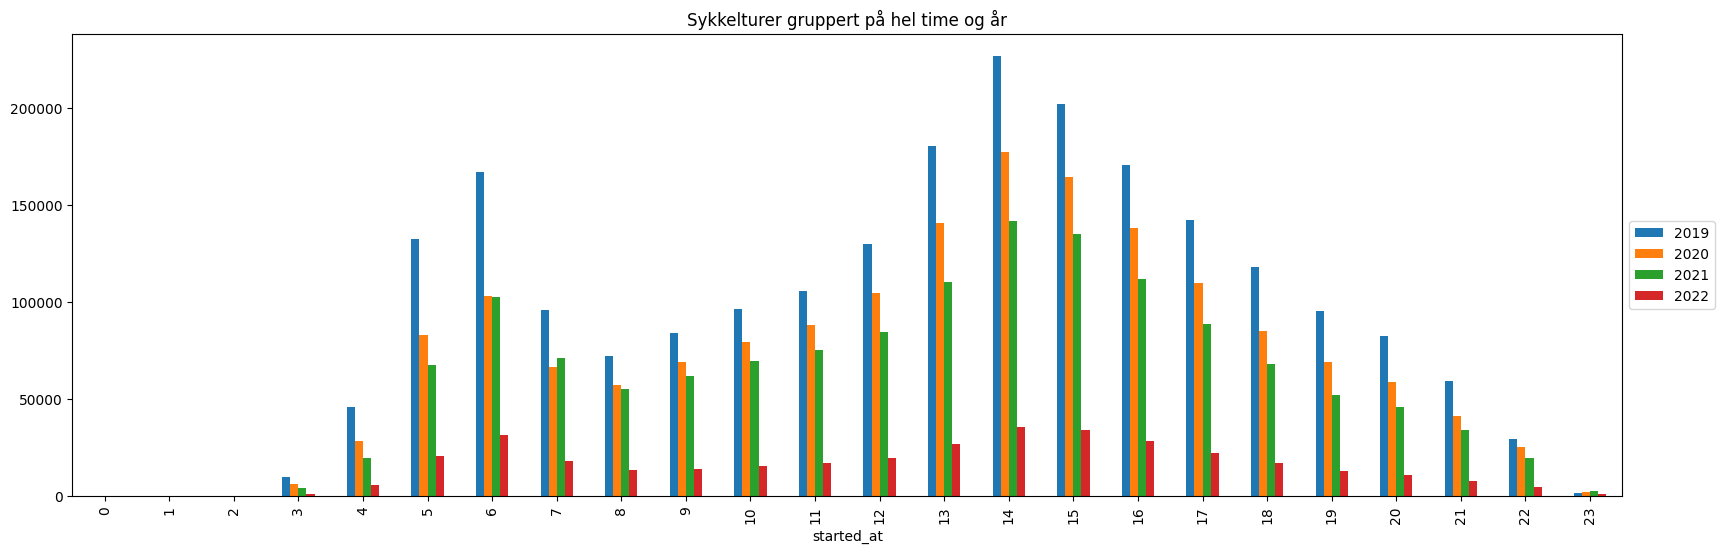

In [ ]:
df.groupby([df["started_at"].dt.hour, df["started_at"].dt.year]) \
  .size() \
  .unstack() \
  .plot(kind="bar", figsize=(20,6), stacked=False, title="Sykkelturer gruppert på hel time og år") \
  .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# TODO
# Dine svar her
"""
Svar A: Ikke logisk, pga. det er i UTC-tid (det åpner ikke kl. 03 på natta)
Svar B: Corona
Svar C: Mindre data
"""

In [ ]:
#@title Løsning Oppgave 3.1
"""
Svar A: Ikke logisk, bysykkel åpner kl. 05 og stenger kl. 01
        Se f.eks https://oslobysykkel.no/sporsmal-og-svar
        Er i UTC-tid (to timer bak)
Svar B: Pandemi + muligens videre utbredelse av elektriske sparkesykler
Svar C: Vi har bare data tom. mai
        Kan verifiseres med df['started_at'].max()
"""

## **Oppgave 3.2: Turer til og fra Skuret**
Koden under produserer en graf over antall turer til og fra Vippetangen, gruppert på time på døgnet og retning. Vippetangen er nærmeste bysykkelstasjon for Bekk sine kontorer, bedre kjent som Skuret.

Hva tenker du om grafen under? Hvilke realiteter kan forklare eventuelle mønster du ser?

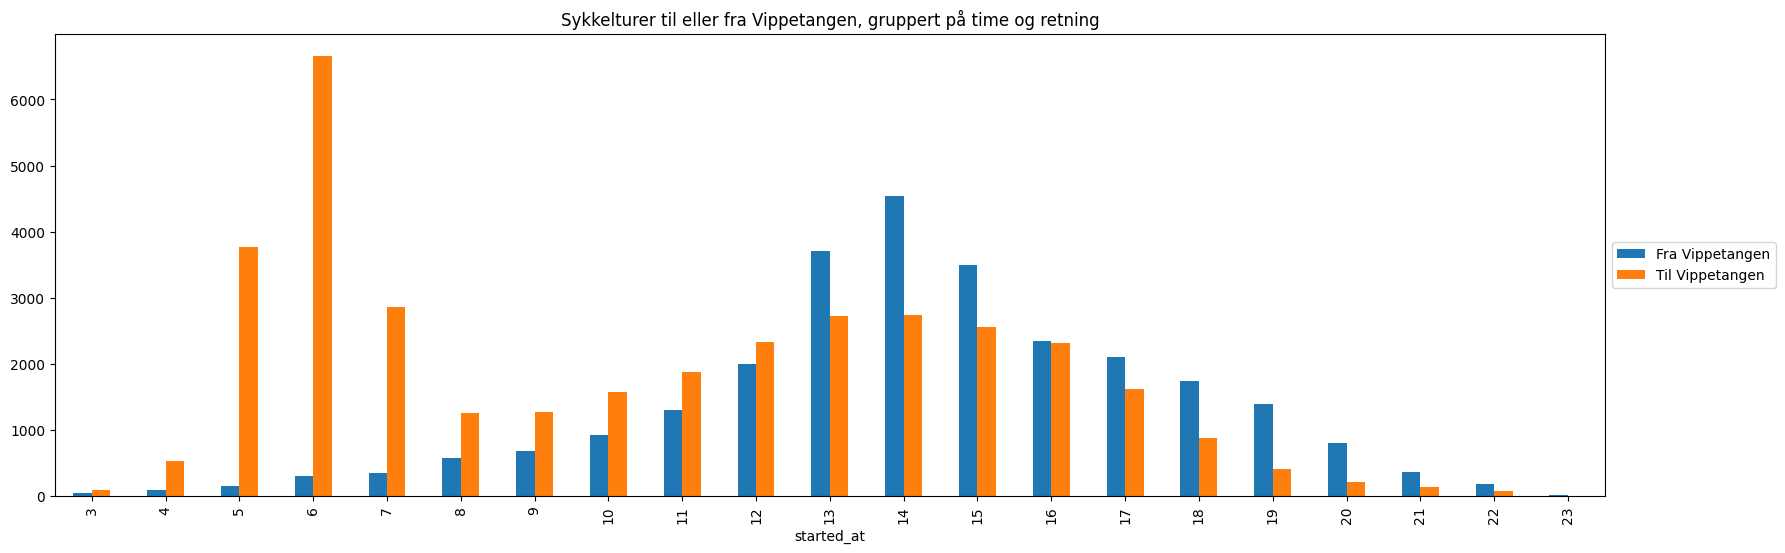

In [ ]:
df_vippetangen = df.query(
    'end_station_name.str.contains("Vippetangen vest") or '
    'end_station_name.str.contains("Vippetangen øst") or '
    'start_station_name.str.contains("Vippetangen vest") or '
    'start_station_name.str.contains("Vippetangen øst")'
).copy()

end_station_is_vippetangen = df_vippetangen['end_station_name'].str.contains("Vippetangen vest") | df_vippetangen['end_station_name'].str.contains("Vippetangen øst")

df_vippetangen.groupby([
    df_vippetangen["started_at"].dt.hour,
    end_station_is_vippetangen
  ]) \
  .size() \
  .unstack() \
  .plot(kind="bar", figsize=(20,6), stacked=False, title="Sykkelturer til eller fra Vippetangen, gruppert på time og retning") \
  .legend(["Fra Vippetangen", "Til Vippetangen"], loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# TODO
# Dine svar her
"""
Gir mening med tanke på jobbhverdag
"""

In [ ]:
#@title Løsning Oppgave 3.2
"""
Trafikken til Vippetangen på morgenen stemmer bra med når en
kan se for seg at folk kommer på jobb (mellom 7 og 9)

Trafikken til tar seg opp igjen utover ettermiddagen. For Bekk
spesifikt kan dette tenkes å ha sammenheng med at folk fra diverse
prosjekter reiser til Skuret for å være med på ettermiddagsarrangement,
faggruppemøter o.l.

Trafikken fra Vippetangen er nokså normalfordelt rundt kl. 16.
Dette stemmer godt med når folk drar fra jobb

Det er viktig å presisere at datagrunnlaget ikke gir noe _bevis_
for det som nevnes over, men kan være aktuelle sammenhenger
å utforske videre om stemmer eller ikke.

Andre faktoer enn Bekk kan også være i spill. F.eks er det
vanlig at stativene på Vippetangen er nokså tomme på morgenen.
Videre fylles bysykkelstativet opp utover morgenen, som gjør at
man ikke får parkert flere sykler der før det tømmes igjen.
"""

## **Oppgave 3.3: Turer til og fra Skuret cont.**

I forrige oppgave fant vi en viss indikasjon på at folk (og da også Bekkere) benytter bysykkel til og fra Vippetangen i forbindelse med jobb. I denne oppgaven skal vi forsøke å få ytterligere bevis for eller mot dette.

Koden under produserer to plott, som begge viser antall turer gruppert på ukedag og årstall:
- Første plott viser turer til Skuret mellom 7 og 9, og turer fra Skuret mellom 15 og 17
- Andre plott viser alle turer i hele Oslo, for hele døgnet

a) Sammenlikn de to plottene. Hvilke mønster (og særlig evt. avvikende mønster) ser du? Hva kan disse eventuelle møstrene indikere?

b) Tror du ansatte i Bekk står for *ingen*, *lite*, *noe*, *betydelig* eller *all* trafikk med bysykkel til og fra Vippetangen?

**NB: koden kan ta en minutt eller to å kjøre, det er mange rader som må prosesseres 😇**

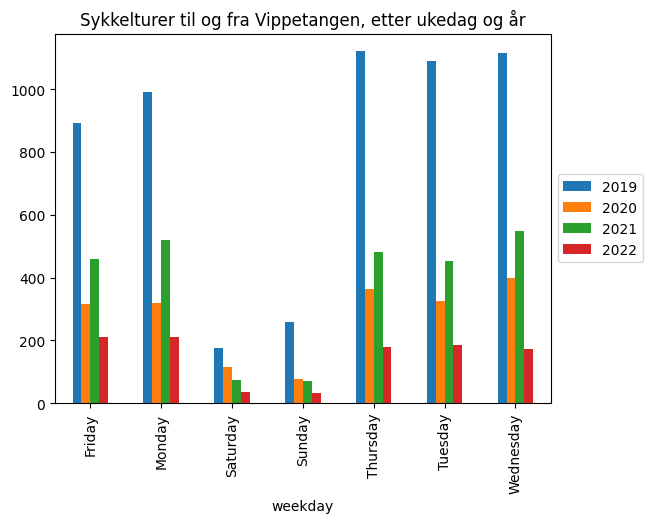

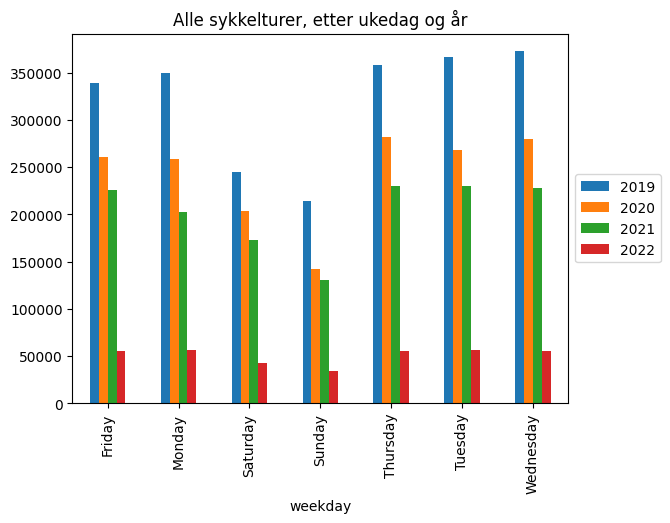

In [ ]:
df['weekday'] = df['date'].dt.day_name()
df_vippetangen = df.query(
    "(end_station_name.str.contains('Vippetangen vest') | end_station_name.str.contains('Vippetangen øst')) & (ended_at.dt.hour > 5) & (ended_at.dt.hour < 7) |"
    "(start_station_name.str.contains('Vippetangen vest') | start_station_name.str.contains('Vippetangen øst')) & (started_at.dt.hour > 13) & (started_at.dt.hour < 15)"
)

df_vippetangen.groupby(["weekday", df_vippetangen["started_at"].dt.year]) \
  .size() \
  .unstack() \
  .plot(kind="bar", stacked=False, title="Sykkelturer til og fra Vippetangen, etter ukedag og år") \
  .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

df.groupby(["weekday", df["started_at"].dt.year]) \
  .size() \
  .unstack() \
  .plot(kind="bar", stacked=False, title="Alle sykkelturer, etter ukedag og år") \
  .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# TODO
# Dine svar her
"""
Svar A:
Svar B:
"""

'\nSvar A: Dette støtter teorien fra oppgave 3.2\nSvar B: lite\n'

In [ ]:
#@title Løsning Oppgave 3.3
"""
Svar A: Nedgangen fra 2019 til 2020 ser ut til å være vesentlig større
        for turer til og fra Vippetangen enn for øvrige turer.
        Fra 2020 til 2021 er det _oppgang_ for Vippetangen, samtidig
        som det er nedgang for øvrige turer.
        Ettersom Bekk (og flere andre arbeidsgivere i Oslo) hadde
        påbud om hjemmekontor i store deler av 2020 kan dette
        være en indikasjon på at nedgangen skyldes bortfall av
        jobbplendlere

Svar B: Jeg ville sagt vi har noen indikasjoner siden differansen i
        nedgang mellom helg og hverdag er nokså stor. Vi har likevel ingen
        overveldende bevis på hvorfor, og det er også verdt å merke seg at
        det finnes andre arbeidsgivere i nærheten som sikkert bruker de
        samme sykkelstativene 🤓
"""

# **Bolk 4: Filtrering og transformering** 🚀
Vi kan utføre en rekke operasjoner på en DataFrame, bl.a. filtere, transformere, fjerne, legge til, plotte, og mye mer. Videre følger noen eksempler som er relevante for akkurat denne workshopen.

**Filtrere basert på kolonneverdier**:
```python
df[
  (df["x"] > a & df["y"] < b) |
  df["z"] > c
]
```

**Filtrering med .query()-operator**:
```python
a = 10
b = 5
c = 2
df.query("(x > {a} and y < {b}) or z > c")
```

**Gruppere data på kolonnerverdi**:
```python
df.groupby(
  df["nrOfApartments"]
)
```

Vi kan finne størrelsen på hver gruppe med bruk av _.size()_-funksjonen:
```python
df.groupby(
  df["nrOfApartments"]
).size()
```

## **Oppgave 4.1: Basic filtrering**
Bruk kommandoene over til å svare på følgende:

a) Hvor mange turer ble gjennomført i hele 2021?
> **Hint:** Bolk 2 introduserte noen innebygde kommandoer som kan være nyttige her

b) Hvor mange unike holdeplasser er det?

In [ ]:
df.describe()

,duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,mean_temperature,precipitation_amount
count,5715392.0,5715392.0,5.715392e+06,5.715392e+06,5715392.0,5.715392e+06,5.715392e+06,5.709430e+06,5.639920e+06
mean,781.311226,516.411435,5.992129e+01,1.074531e+01,518.840918,5.991905e+01,1.074435e+01,1.361400e+01,2.282595e+00
std,5162.121142,178.822913,9.982860e-03,2.346419e-02,182.043337,8.979482e-03,2.244064e-02,6.158285e+00,5.514382e+00
min,61.0,377.0,5.989813e+01,1.065112e+01,377.0,5.989813e+01,1.065112e+01,-1.070000e+01,0.000000e+00
25%,345.0,431.0,5.991372e+01,1.073048e+01,437.0,5.991219e+01,1.073104e+01,9.600000e+00,0.000000e+00
50%,539.0,489.0,5.992022e+01,1.074975e+01,489.0,5.991748e+01,1.074968e+01,1.430000e+01,0.000000e+00
75%,845.0,563.0,5.992761e+01,1.076093e+01,561.0,5.992473e+01,1.075949e+01,1.800000e+01,1.700000e+00
max,8685730.0,2340.0,5.995341e+01,1.081431e+01,2340.0,5.995341e+01,1.081431e+01,2.680000e+01,4.370000e+01


In [ ]:
# TODO
# Dine svar her
"""
Svar A:
Svar B:
"""

In [ ]:
#@title Løsning Oppgave 4.1

# A)
df[(df["started_at"] > '2020-12-31') & (df["ended_at"] < '2022-01-01')].shape[0]

# B)
df.groupby(df["start_station_id"]).size()

"""
Svar A: 1420010
Svar B: 275
"""

'\nSvar A: 1420010\nSvar B: 275\n'

## **Oppgave 4.2: Visualisering**
For visualisering av data er det vanlig å bruke et bibliotek som heter Matplotlib. I denne workshoppen klarer vi oss med å benytte Pandas sin _plot_-funksjon (som også benytter Matplotlib).

Hvilke type plott en bør velge avhenger av hva en ønsker å visualisere. Noen eksempler:
- **bar** (sammenlikne grupperte verdier, f.eks antall sykkelturer per år)
- **pie** (samme som over, men med en litt annen visualisering)
- **scatter** (sammenlikne to ulike kolonneverdier, f.eks sammenhengen mellom temperatur og nedbør)
- ... og flere andre som vi ikke går inn på nå

Argumentet _figsize_ kan settes for å endre størrelse på visualiseringen

**Bar-plot:**
```python
df.groupby(
  df["some_column"]
).size().plot(kind="bar", figsize=(20, 6))
```
Erstatt _"bar"_ med _"pie"_ for tilsvarende pie-plot

**Scatter-plot:**
```python
df.plot(kind="scatter", x="some_column_1", y="some_column_2")
```

a) Lag et stolpediagram over antall turer *fra* de ti mest populære holdeplassene.

> **Hint:** du kan sortere resultatet av et kall til .size()-funksjonen og hente de N første radene med ```size().sort_values(ascending=False)[:N]```  


In [ ]:
# Din kode her

b) Lag et spredningsplott med longitude og latitude for startholdeplassen på hhv. x- og y-aksen

> **Hint:** Å scatter-plotte alle radene i hele _df_ vil ta lang tid. Vi er kun interessert i ett punkt for hver holdeplass. Bruk derfor ```df.drop_duplicates(subset=["start_station_id"])``` før kallet til plot-funksjonen

In [ ]:
# Din kode her

Åpne kart over Oslo Bysykkel [sine holdeplasser](https://oslobysykkel.no/stasjoner). Ser du noen likheter med scatter-plottet du nettopp lagde?

In [ ]:
#@title Løsning Oppgave 4.2

# A)
df.groupby(
  df["start_station_name"]
).size().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6))

# B)
df.drop_duplicates(subset=["start_station_id"]).plot(
  kind="scatter",
  y="start_station_latitude",
  x="start_station_longitude"
)

## **Oppgave 4.3: Nedbør og antall turer hvert døgn**
Under har vi laget en ny dataframe, *df_prec*, som inneholder tre kolonner med hhv. nedbør, dato og antall turer den datoen.

Kjør kodeblokka under:

In [ ]:
df_prec = df.groupby(
    ["precipitation_amount", "date"]
  ).size() \
  .to_frame(name="count") \
  .reset_index()
df_prec.head()

Man kan tenke seg at antallet turer som gjennomføres med bysykler er væravhengig. Nå som vi både har lært om filtrering _og_ visualisering kan vi kombinere dette for å gi oss et bedre inntrykk av sammenhengen mellom antallet turer og nedbørsmengde:

a) Filtrer de radene med mer enn 1000 turer og mer enn 10mm nedbør, og plott punktene i et scatter-plot med antall turer på X-aksen og nedbørsmengde på Y-aksen

In [ ]:
# TODO
# Din kode her, oppgave a)

In [ ]:
#@title Løsning Oppgave 4.3 A

df_prec[
    (df_prec["count"] > 1000) &
    (df_prec["precipitation_amount"] > 10)
].plot(kind="scatter", x="count", y="precipitation_amount")

b) Basert på plottet i forrige deloppgave, hva kan vi si om sammenhengen mellom nedbør og antall turer? Vil du påstå nedgangen i antall turer på dager med mye nedbør er større, lik eller mindre enn forventet?

> **Hint:** Se f.eks etter outliers (punkter som skiller seg ut), mønster, trender og liknende  

In [ ]:
# TODO
# Din kode her, oppgave b)

In [ ]:
#@title Løsning Oppgave 4.3 B

"""
  Jeg vil påstå det er vesentlig flere dager enn
  forventet med både mye nedbør og mange turer.
  En ville forventet å se en drastisk nedgang i
  antall turer på dager med mye regn.

  En potensielt stor feilkilde i vårt datagrunnlag
  er at turene foregår i nokså korte tidsrom, mens
  nedbørsmengden er hentet fra en datakilde
  som oppgir nedbør hvert hele døgn. Når på døgnet
  og med hvilken intensitet nedbøret pågikk kan ha
  vesentlig innvirkning på antall nedbørsfrie turer
  den dagen, og dermed også totalt antall turer.

  En annen variabel er at vi, basert på de overfladiske
  undersøkelsene vi har gjort så langt, ikke vet noe
  mer om dagene vi ville ansett som outliers i plottet.
  Er det dager der en stor begivenhet pågikk?
  Er det en hverdag, og dermed påvirket av pendlere
  som sykler til/fra jobb uavhengig av vær?
  Nærmere undersøkelser er nødvendig for å si noe
  helt konkret.

  ....

  Akkurat i dette tilfellet kan vi derimot med sikkerhet
  si at datagrunnlaget vårt er feil. Bakgrunnen for
  dette er at de som sammenstilte dataen i ettertid
  fant ut at nedbøren ikke er målt mellom kl. 00
  hver dag, men mellom kl. 06. Dette gjør at
  nedbørsmengden pr døgn er direkte feil... 🥲

"""

# Avsluttende ord 📝
## Roller innen data og analyse
Uten å kjenne bransjen kan det være litt uklart hvilke roller innen data og analyse som eksisterer. I forrige workshop om rollen som data engineer lærte du om prosessen med å samle inn, lagre, transformere og tilgjengeliggjøre data. Resultatet av denne prosessen er data av ulik kvalitet og på ulikt format, som kan benyttes av ulike konsumenter. Noen av disse er:
- **Folk i ikke-tekniske roller**, f.eks forretningsanalytikere, som eksponeres for dataen via helintegrerte løsninger og/eller enkle grensesnitt. Disse har god forståelse av selskapets forretningsområde, og bruker data og analyse for å gjøre strategiske valg
- **Dataanalytikere**, som visualiserer og bearbeider data for å finne statistiske sammenhenger og trender. Disse har behov for prosessert data av god kvalitet, men kan gjøre enkle transformasjoner og filtreringer selv
- **Maskinlæringsteknikkere** ("ML engineers"), med behov for unbiased data til å trene, evaluere og tilgjengeliggjøre mer avanserte modeller og verktøy.
- **Data scientists**, som arbeider på et dypere teknisk og teoretisk nivå enn dataanalytikerne. Større grad av autonomi, og behov for kontroll og fleksibilitet i datagrunnlaget. Forsøker gjerne å finne nye, innotivate måter å skape verdi fra data på

Ulike virksomheter vil kreve ulike blandinger av disse rollene. Et forsøk på en slags kategorisering er som følger:
- **Maskinlæring, modellering eller AI er en vesentlig del av kjerneproduktet.** Krever større andel data scientists og ML-engineers, for å utvikle state-of-the-art teknikker og trene modeller som kan rulles ut til produktene sine. Eksempel: Tesla, DeepMind
- **Data er en vesentlig del av kjerneproduktet.** Krever større andel data engineer som kan tilgjengeliggjøre data, og forretningsutviklere som kan forstå kundenes databehov. F.eks: selskaper som leverer data-as-a-service, Unacast
- **Data og modellering som essensielt verktøy for beslutningsstøtte.** Litt av alle roller. Typisk selskaper der data og analyse kan være et viktig verktøy for å understøtte selskapet forretningsutvikling og beslutningstaking, men ikke i seg selv er en del av kjernevirksomheten. Eksempel: forsikringsselskaper, banker, reklameselskaper mm.
- **Som øvrig verktøy.** Data og analyse vil kunne gi verdi, men er lavere prioritert og utføres mer ad hoc. I mindre selskaper kan f.eks en utvikler ha birolle som data engineer, mens en annen har birolle som analytiker.

## Hvordan komme i gang med data og analyse
Det er vanskelig å gi noen universielle og konkrete råd, men:
- Dersom du er interessert i en rolle som **analytiker** bør du bruke tid på å lære deg grunnleggende uthenting, transformasjon og visualisering, samt bli kjent med moderne verktøy som Google Data Studio, Microsoft Power BI og/eller Tableau.

- Dersom du er interessert i **modellering og/eller data science** bør du tilegne deg en grunnleggende forståelse for statistikk, statistisk modellering og statistisk signifikans. Statistikk er helt essensielt i så godt som alle datadrevne metoder. Videre bør man bli kjent med kodepakker som f.eks pandas, keras, sklearn, tensorflow, og/eller pytorch.